# Predicting Survival in the Titanic Data Set

In [2]:
#Importing Modules

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
#Importing Dataset

url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Median of age gender wise
titanic.groupby('Sex').Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


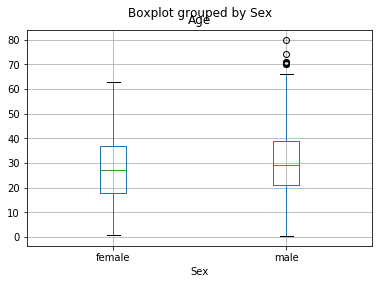

In [5]:
# visualize using boxplot
titanic[titanic.Age.notnull()].boxplot('Age','Sex');

In [6]:
# Replace null values of age with median age of gender
age_sex_median = titanic.groupby('Sex').Age.transform('median')
titanic.Age.fillna(age_sex_median, inplace=True)

In [7]:
# Convert the sex attribute from category to numeric
titanic_dummies_sex = pd.get_dummies(titanic.Sex, drop_first=True, prefix='Gender')
titanic = titanic.join(titanic_dummies_sex)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# As per instruction, I use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard) and Fare to predict whether a passenger survived.

In [8]:
X = titanic[['Pclass','Gender_male','Age','SibSp','Parch','Fare']]
y = titanic['Survived']

In [9]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the model and make predictions

In [10]:
# train the decision tree
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [11]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

# Evaluate the model's performance
Including the tree's axis-parallel decision boundaries and how the tree splits

In [12]:
metrics.confusion_matrix(y_train, dtree.predict(X_train))

array([[381,   0],
       [ 16, 226]], dtype=int64)

In [13]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print(conf_mat)
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TP = conf_mat[1][1]
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("True Positive :",TP)

[[147  21]
 [ 33  67]]
True Negative : 147
False Positive : 21
False Negative : 33
True Positive : 67


In [30]:
# how did my model perform?
Error = (FP + FN)/(TN+FP+FN+TP)
print('Classification Error: {:.2f}'.format(Error))
Accuracy = (TP + TN)/(TN+FP+FN+TP)
print("Accuracy : {:.2f}".format(Accuracy))
# Out of actual survived, how much is predicted as survived?
Sensitivity = TP/(FN+TP)
print("Sensitivity/Recall/True Positive Rate: {:.2f}".format(Sensitivity))
# Out of actual not survived, how much is predicted as not survived?
Specifity = TN/(FP+TN)
print("Specifity : {:.2f}".format(Specifity))
# when the actual not survived, how much is predicted as survived?
FPR = FP/(TN+FP)
print("False Positive Rate : {:.2f}".format(FPR))
# when the predicted value is survived, how much prediction is correct?
Precision_1 = TP/(FP+TP)
print("Precision for 1: {:.2f}".format(Precision_1))
# when the predicted value is not survived, how much prediction is correct?
Precision_0 = TN/(FN+TN)
print("Precision for 0 : {:.2f}".format(Precision_0))

Classification Error: 0.20
Accuracy : 0.80
Sensitivity/Recall/True Positive Rate: 0.67
Specifity : 0.88
False Positive Rate : 0.12
Precision for 1: 0.76
Precision for 0 : 0.82


The F1-score reveals weighted average between precision and recall which means if the value approaches 1, it's infered as a good score.

In [31]:
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.82      0.88      0.84       168
          1       0.76      0.67      0.71       100

avg / total       0.80      0.80      0.80       268



# Null accuracy: Accuracy that could be achieved by always predicting the most accurate class

In [15]:
# Examine the class distribution of the testing set
y_test.value_counts()

0    168
1    100
Name: Survived, dtype: int64

In [16]:
# Calculate the percentage of Ones
y_test.mean()

0.373134328358209

In [17]:
# Calculate the percentage of Zeros
1-y_test.mean()

0.6268656716417911

In [18]:
# Calculate the null accuracy which suggets passenger died is correct 62% of the time
max(y_test.mean(),1-y_test.mean())

0.6268656716417911

In [19]:
# Calculate the null accuracy (for multi class classification problem)
y_test.value_counts().head(1)/len(y_test)

0    0.626866
Name: Survived, dtype: float64

# Comparing the true and predicted response values

In [20]:
# Print the first 25 true and predicted responses
print('True values : ',y_test.values[0:25])
print('Pred values : ',y_pred[0:25])

True values :  [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0]
Pred values :  [0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0]


In [21]:
X = titanic[['Pclass','Gender_male','Age','SibSp','Parch','Fare']].iloc[:841,:]
from sklearn.cross_validation import KFold
cv = KFold(n=len(X),  # Number of elements
           n_folds=29,            # Desired number of cv folds
           random_state=48) 
fold_accuracy = []

for train_fold, valid_fold in cv:
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, y = train_y)
    valid_acc = model.score(X = valid, y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.68965517241379315, 0.75862068965517238, 0.7931034482758621, 0.68965517241379315, 0.82758620689655171, 0.7931034482758621, 0.89655172413793105, 0.65517241379310343, 0.68965517241379315, 0.75862068965517238, 0.89655172413793105, 0.75862068965517238, 0.82758620689655171, 0.86206896551724133, 0.7931034482758621, 0.7931034482758621, 0.89655172413793105, 0.72413793103448276, 0.72413793103448276, 0.72413793103448276, 0.93103448275862066, 0.82758620689655171, 0.75862068965517238, 0.7931034482758621, 0.75862068965517238, 0.82758620689655171, 0.7931034482758621, 0.7931034482758621, 0.75862068965517238] 

Average accuracy:  0.785969084423


E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# On the basis of Train Test split method, i get accuracy of 80% which is pretty good as a model. A more strong point is while applying K fold cross validation on the model across the dataset, it's found that average accuracy sore is 78%. 